In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Setting options to display all rows and columns
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.width=None

In [3]:
heartdata=pd.read_csv("C:\\python_class\\HeartDisease.csv",na_values=('?',"#",'',' '))
heartdata.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heartdata.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# DATA PRE-PROCESSING

## Part-1-Handling missing values

In [6]:
heartdata.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

### No missing values is our dataset

## Part-2-Encoding 

### It's not required as there are no columns with categorical values

## Part-3-Outlier Detection

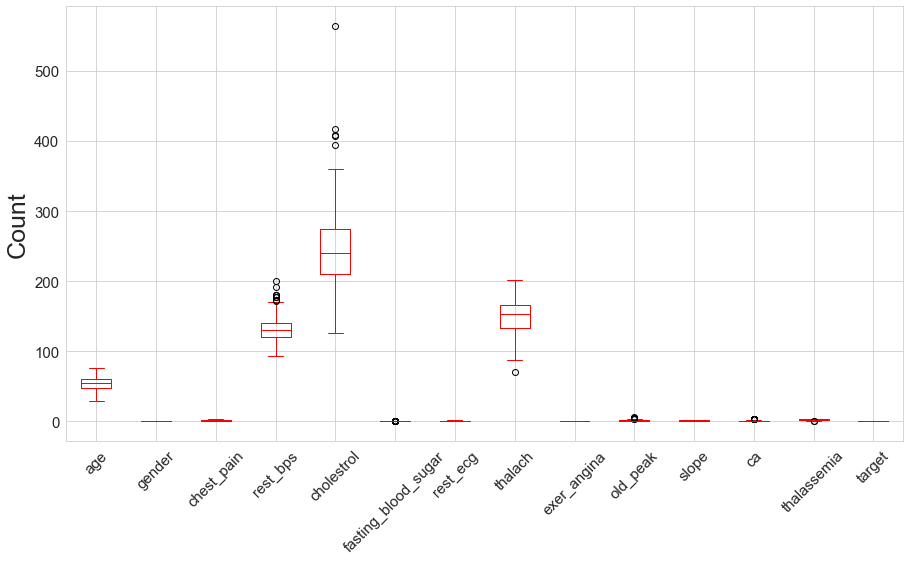

In [7]:
# Plotting boxplot
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
heartdata.boxplot(rot=90,color='red')
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Count", fontsize=25)
plt.show() 

### There are some outliers present in our dataset

In [8]:
heartdata.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [9]:
# Replacing outliers with median
#function to return a list of index of outliers
column_list = ['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol','fasting_blood_sugar', 'rest_ecg', 'thalach', 
               'exer_angina', 'old_peak','slope', 'ca', 'thalassemia']
for feature in column_list:
    Q1= heartdata[feature].quantile(0.25)
    Q3 =heartdata[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    
    lower_limit = Q1 - 1.5 * IQR

    upper_limit = Q3 + 1.5 * IQR
    
    median = heartdata[feature].median()
    heartdata[feature] = np.where(heartdata[feature]< lower_limit, median,heartdata[feature])
    heartdata[feature] = np.where(heartdata[feature]> upper_limit, median,heartdata[feature])

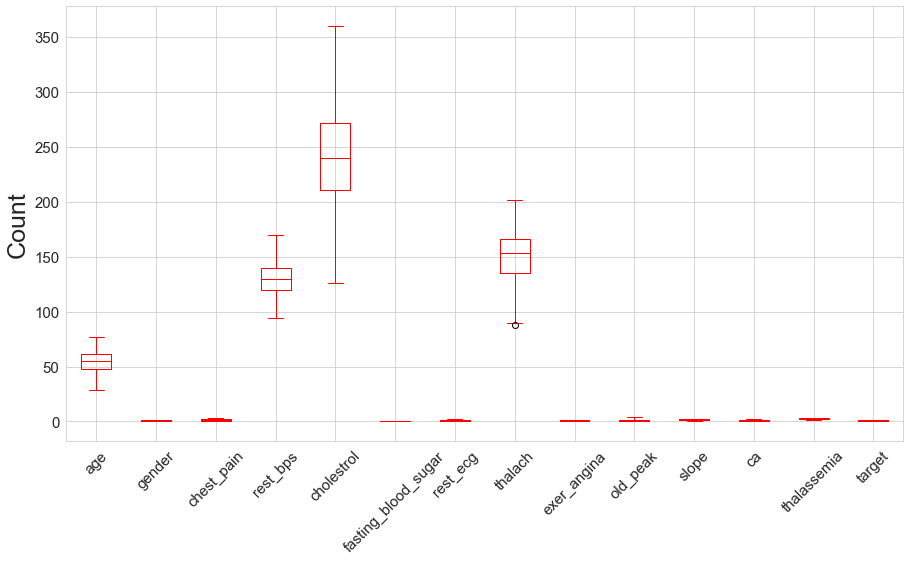

In [10]:
# Plotting boxplot
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
heartdata.boxplot(rot=90,color='red')
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Count", fontsize=25)
plt.show() 

## Part-4-Feature Scaling

In [11]:
# Separating dependent and independent variables
X = heartdata.drop(["target"], axis=1)
y=heartdata["target"]

In [12]:
X.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
0,63.0,1.0,3.0,145.0,233.0,0.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [15]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.952197,0.681005,1.973123,0.986912,-0.223828,0.0,-1.005832,0.003681,-0.696631,1.278089,-2.274579,-0.658347,-2.279386
1,-1.915313,0.681005,1.002577,-0.006118,0.156931,0.0,0.898962,1.654307,-0.696631,2.432655,-2.274579,-0.658347,-0.561341
2,-1.474158,-1.468418,0.032031,-0.006118,-0.873358,0.0,-1.005832,0.985134,-0.696631,0.412164,0.976352,-0.658347,-0.561341
3,0.180175,0.681005,0.032031,-0.668138,-0.156635,0.0,0.898962,1.252803,-0.696631,-0.165120,0.976352,-0.658347,-0.561341
4,0.290464,-1.468418,-0.938515,-0.668138,2.486281,0.0,0.898962,0.583631,1.435481,-0.357547,0.976352,-0.658347,-0.561341


# EDA

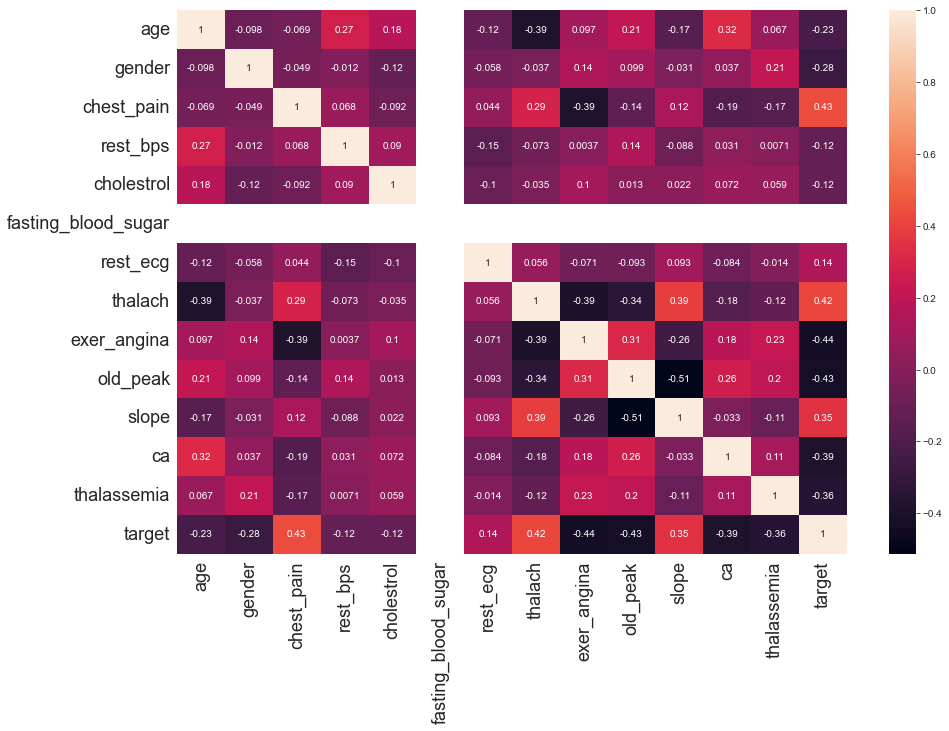

In [16]:
# correlational matrix
corr = heartdata.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,   annot=True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

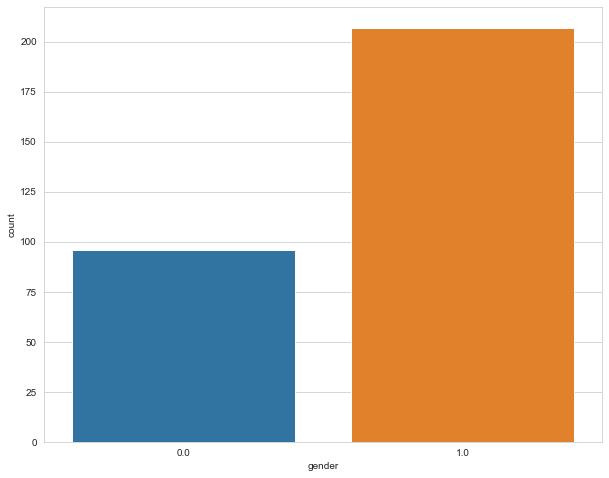

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x="gender", data=heartdata)
plt.show()

In [18]:
# dividing age values into groups
lst = [heartdata]
for column in lst:
    column.loc[(column['age']>=25) & (column['age']<=39), "age_category"]=30
    column.loc[(column['age']>=40) & (column['age']<=49), "age_category"]=40
    column.loc[(column['age']>=50) & (column['age']<=59), "age_category"]=50
    column.loc[(column['age']>=60) ,"age_category"]=60
    
heartdata['age_category'] = heartdata['age_category'].astype(np.int64)
heartdata.dtypes

age                    float64
gender                 float64
chest_pain             float64
rest_bps               float64
cholestrol             float64
fasting_blood_sugar    float64
rest_ecg               float64
thalach                float64
exer_angina            float64
old_peak               float64
slope                  float64
ca                     float64
thalassemia            float64
target                   int64
age_category             int64
dtype: object

In [19]:
heartdata.age_category.value_counts()

50    125
60     90
40     72
30     16
Name: age_category, dtype: int64

# removing age column, as we have created a new column"age categories"

In [20]:
heartdata.drop(['age'], axis=1,inplace=True)

# Splitting data into train and test data

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y , test_size=0.25, random_state=101)

In [22]:
print(X_train.shape)
print(X_test.shape)

(227, 13)
(76, 13)


# Using Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [24]:
## Prediction using Decision Tree

In [25]:
y_pred_logit_train = logit.predict(X_train)
y_pred_logit_test = logit.predict(X_test)

In [26]:
## Classification report

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred_logit_test))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        37
           1       0.82      0.92      0.87        39

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



In [ ]:
## Confusion matrix

In [30]:
print(confusion_matrix(y_train, y_pred_logit_train))
print("####"*10)
print(confusion_matrix(y_test, y_pred_logit_test))

[[ 83  18]
 [  9 117]]
########################################
[[29  8]
 [ 3 36]]


In [31]:
## Accuracy 

In [32]:
print(accuracy_score(y_train, y_pred_logit_train))
print("####"*30)
print(accuracy_score(y_test, y_pred_logit_test))

0.8810572687224669
########################################################################################################################
0.8552631578947368
